# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import pandas as pd

# Load signnames data
signnames = pd.read_csv('signnames.csv')['SignName']

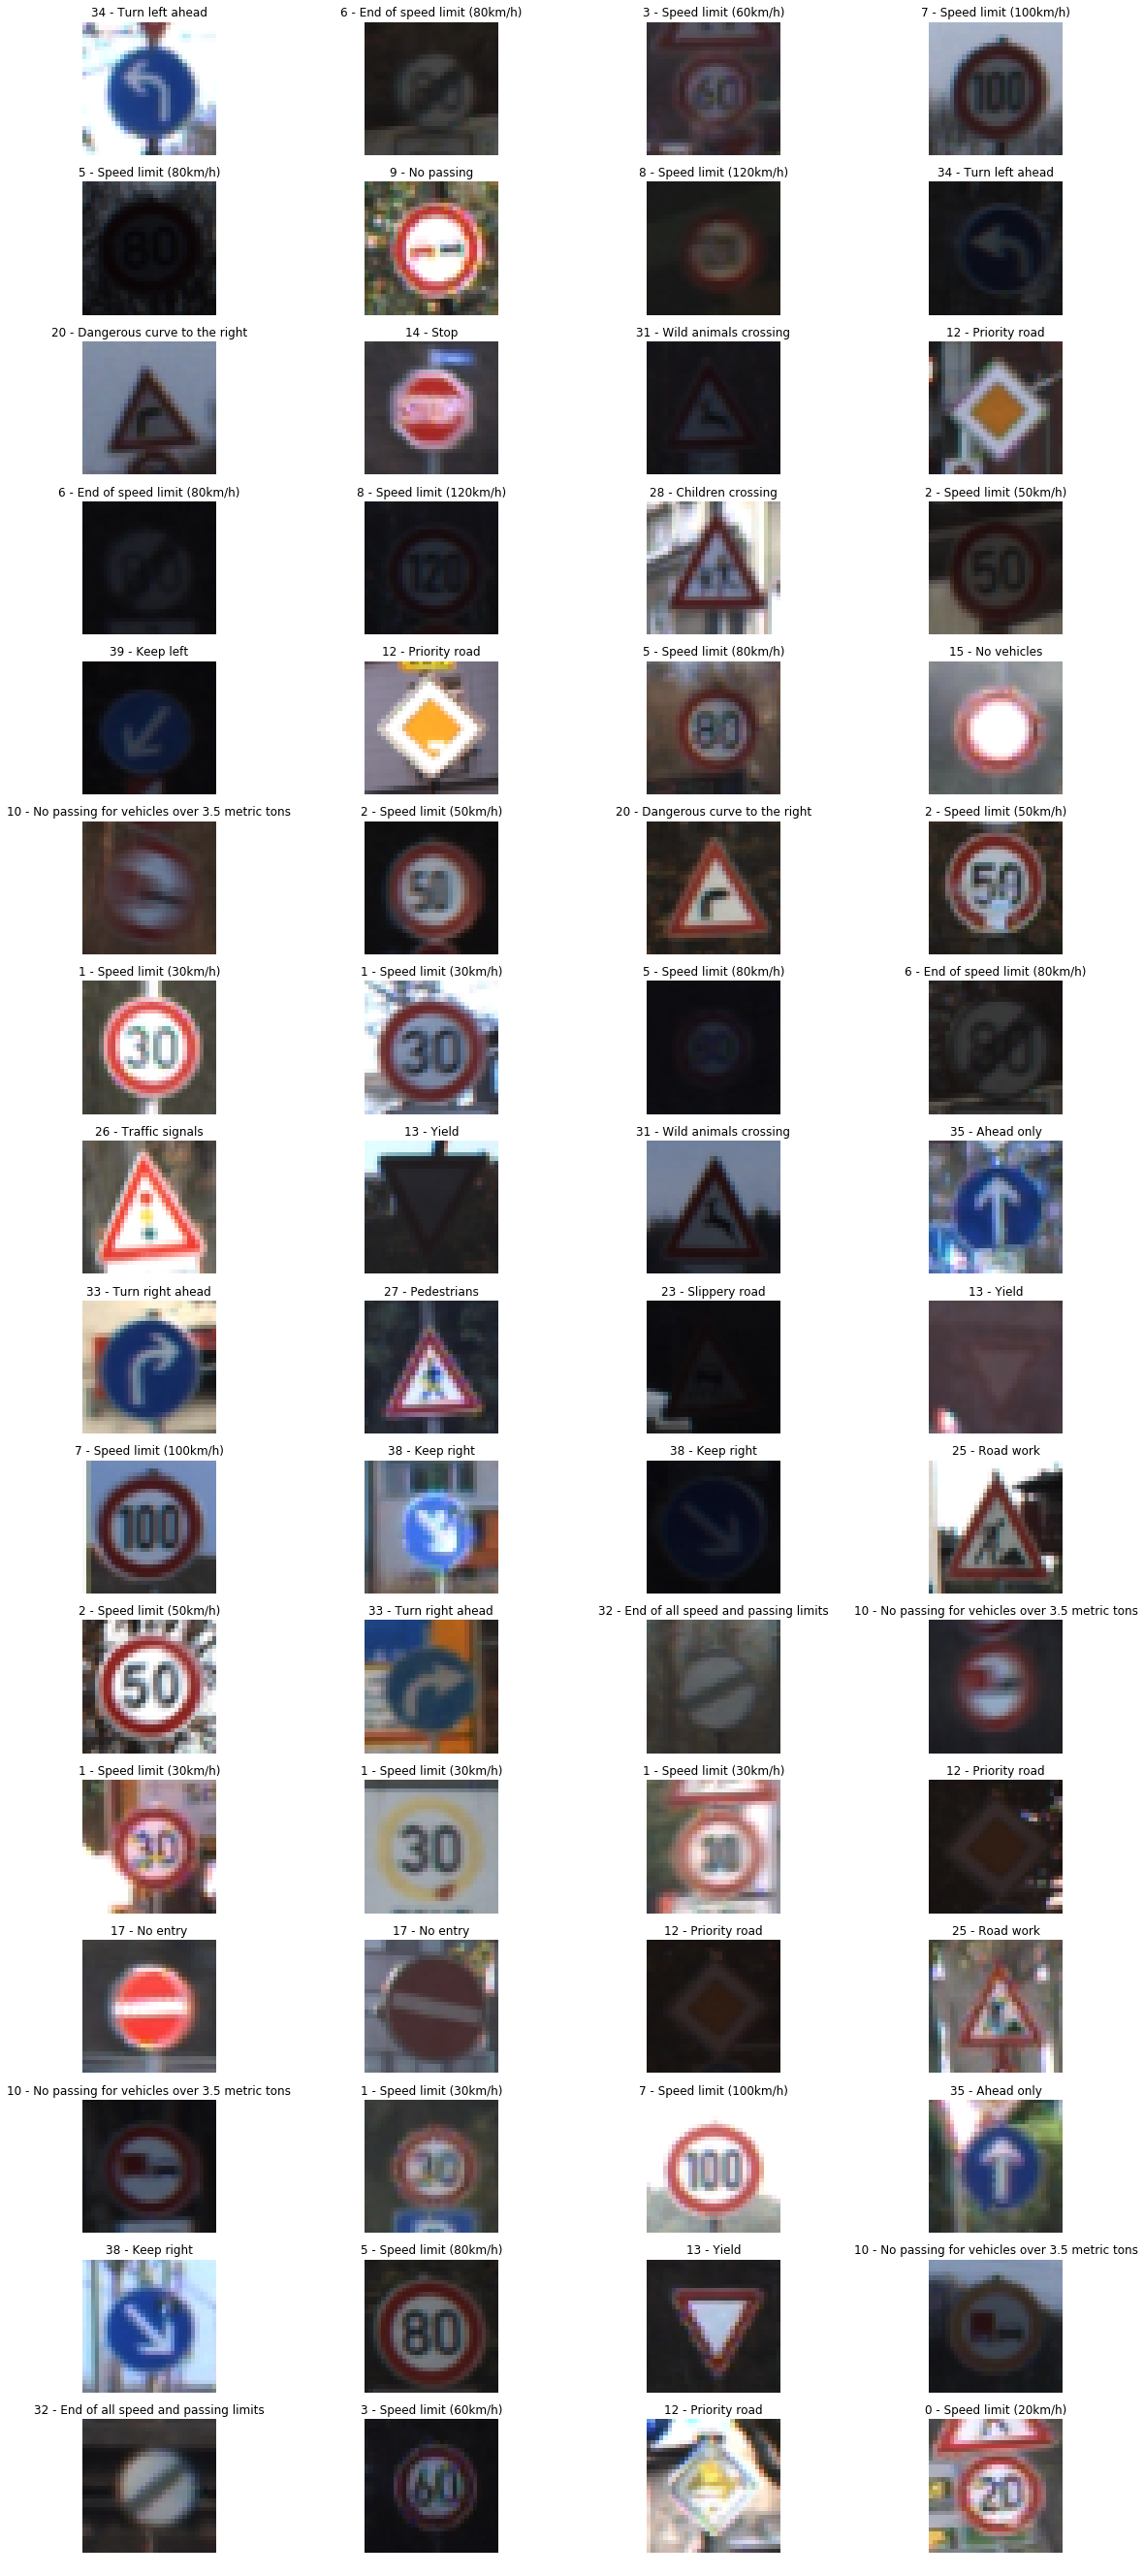

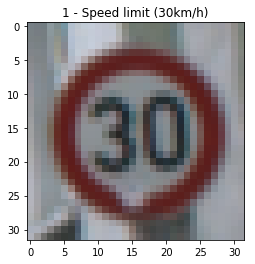

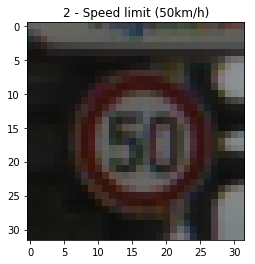

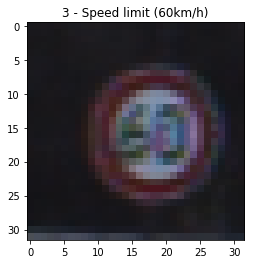

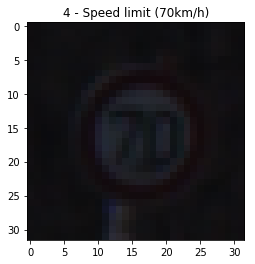

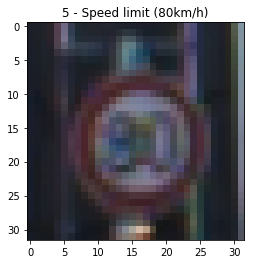

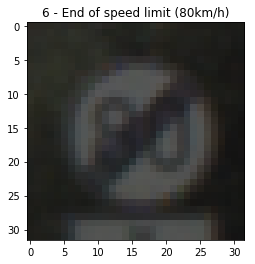

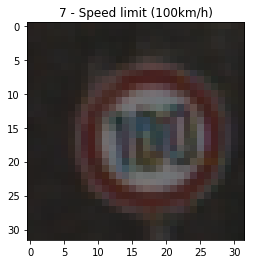

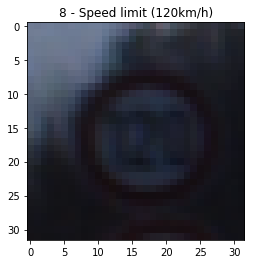

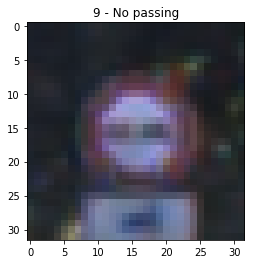

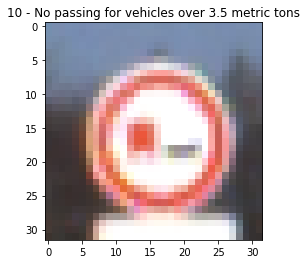

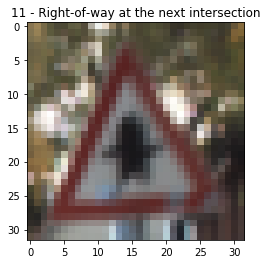

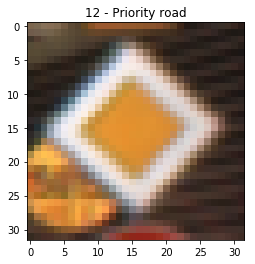

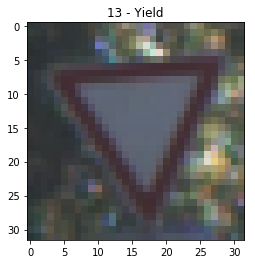

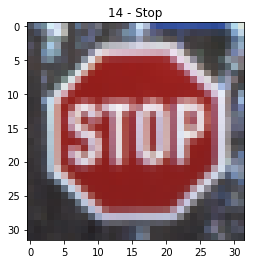

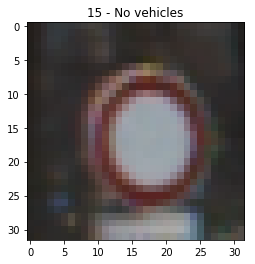

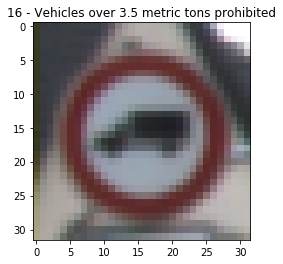

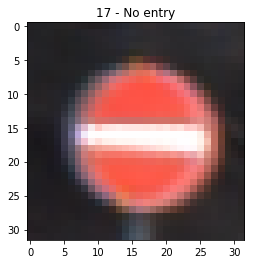

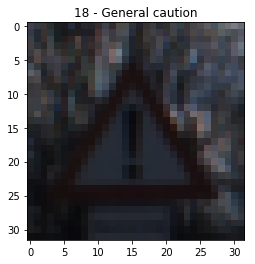

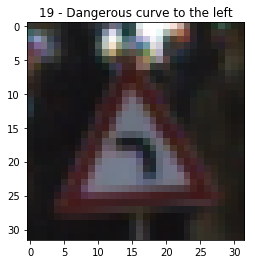

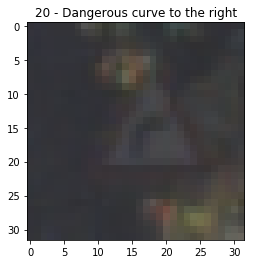

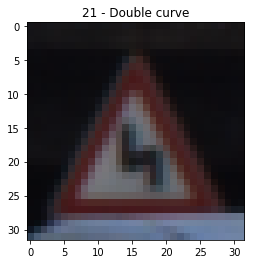

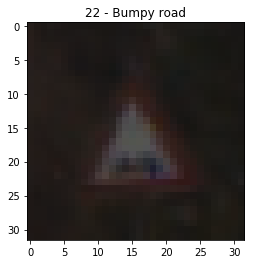

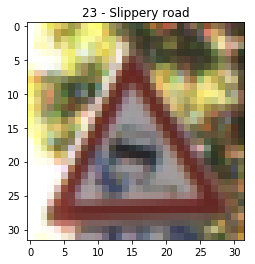

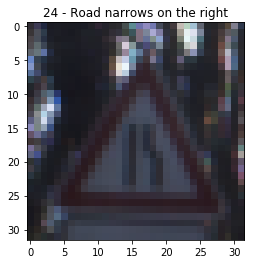

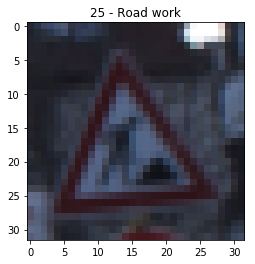

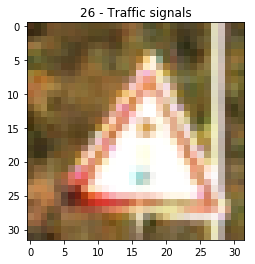

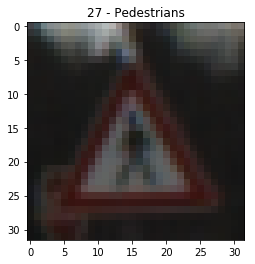

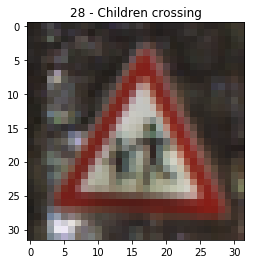

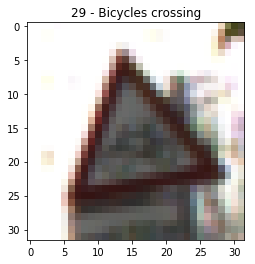

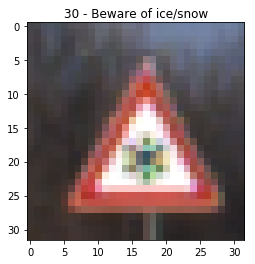

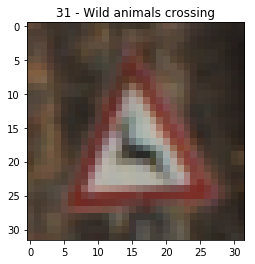

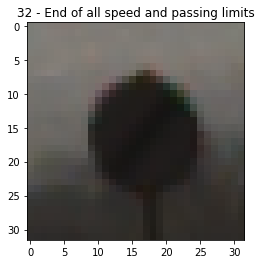

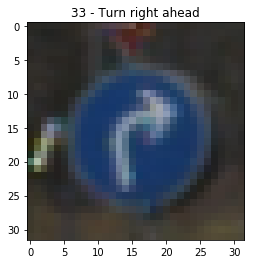

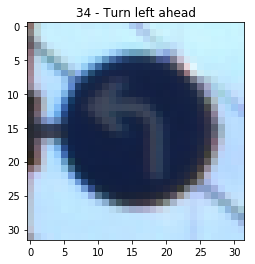

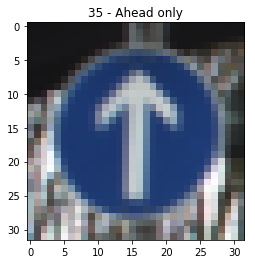

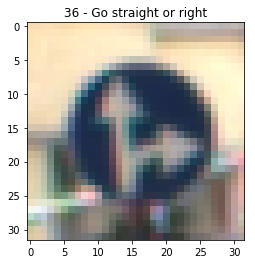

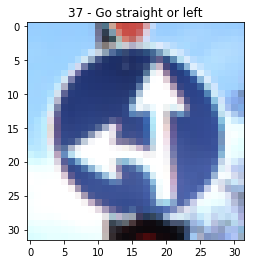

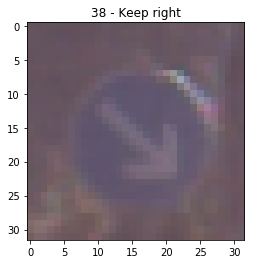

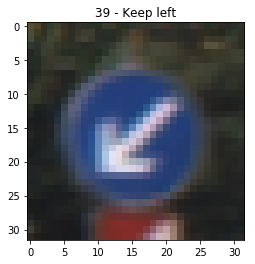

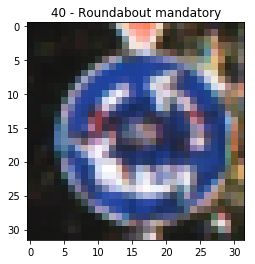

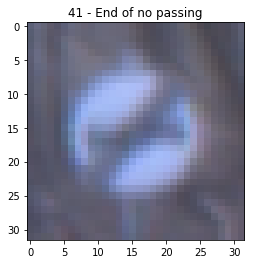

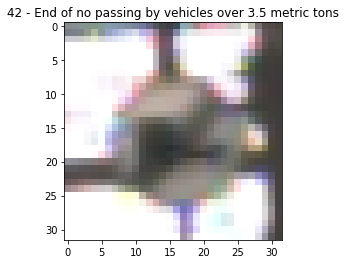

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import scipy.stats
# Visualizations will be shown in the notebook.
%matplotlib inline

# show list of random images images
def visualize_images(images, labels, rows = 16, columns = 4):
    f, axarr = plt.subplots(rows, columns, figsize=(20, 48))
    nrow = 0
    ncol = 0

    for i in range(columns*rows):
        index = random.randint(0, len(images)-1)
        axarr[nrow, ncol].set_title('{} - {}'.format(labels[index], signnames[labels[index]]))
        axarr[nrow, ncol].imshow(images[index])
        axarr[nrow, ncol].axis('off')

        if ncol == (columns-1):
            nrow += 1
            ncol = 0
        else:
            ncol += 1
            
def visualize_label_images(x, y):
    unique_labels, label_counts = np.unique(y, return_counts=True)
    
    for label_id in unique_labels:
        # Retrieve a random image shape
        label_images = X_train[np.where(y_train == label_id)]
        random_label_image = label_images[np.random.randint(0, label_images.shape[0])]
        plt.title("{} - {}".format(label_id, signnames[label_id]))
        plt.imshow(random_label_image)
        plt.show()
    

        

visualize_images(X_train, y_train)
visualize_label_images(X_train, y_train)

# visualize_images(X_test, y_test)
    
    


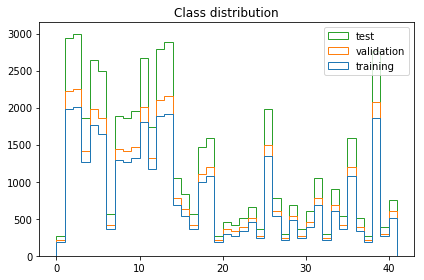

min label count: 180
max label count: 2010
Speed limit (20km/h) - 180
Speed limit (30km/h) - 1980
Speed limit (50km/h) - 2010
Speed limit (60km/h) - 1260
Speed limit (70km/h) - 1770
Speed limit (80km/h) - 1650
End of speed limit (80km/h) - 360
Speed limit (100km/h) - 1290
Speed limit (120km/h) - 1260
No passing - 1320
No passing for vehicles over 3.5 metric tons - 1800
Right-of-way at the next intersection - 1170
Priority road - 1890
Yield - 1920
Stop - 690
No vehicles - 540
Vehicles over 3.5 metric tons prohibited - 360
No entry - 990
General caution - 1080
Dangerous curve to the left - 180
Dangerous curve to the right - 300
Double curve - 270
Bumpy road - 330
Slippery road - 450
Road narrows on the right - 240
Road work - 1350
Traffic signals - 540
Pedestrians - 210
Children crossing - 480
Bicycles crossing - 240
Beware of ice/snow - 390
Wild animals crossing - 690
End of all speed and passing limits - 210
Turn right ahead - 599
Turn left ahead - 360
Ahead only - 1080
Go straight or 

In [5]:
# Visualize normal distribution

def visualize_class_distribution(classes):
    fig, axes = plt.subplots()

    labels = ['training', 'validation', 'test']

#     axes.hist(classes, bins=10, histtype='stepfilled', stacked=True, alpha=0.8, density=True)
    axes.hist(classes, bins=range(0,42), histtype='step', stacked=True, label=labels)
    axes.set_title('Class distribution')
    axes.legend(prop={'size': 10})


    fig.tight_layout()
    plt.show()
    
# Show distribution of classes
visualize_class_distribution([y_train, y_valid, y_test])

# Get label counts
unique_labels, label_counts = np.unique(y_train, return_counts=True)

print('min label count:',np.min(label_counts))
print('max label count:',np.max(label_counts))

for signname, label_count in np.asarray((signnames[unique_labels], label_counts)).T:
    print('{} - {}'.format(signname, label_count))
    


training set mean: 15.738297077502228
training set standard deviation 12.002396466891161
validation set mean: 16.183673469387756
validation set standard deviation 12.089811535677788
test set mean: 15.551068883610451
test set standard deviation 11.946650214664762


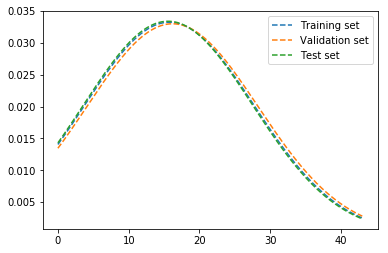

In [6]:
# Visualize the normal distribution of the classes among the sets
x = np.arange(0, 43, 0.001)

# Training
y_train_mean = np.mean(y_train)
y_train_sd = np.std(y_train)
print('training set mean:', y_train_mean)
print('training set standard deviation', y_train_sd)
y_train_norm = scipy.stats.norm.pdf(x, y_train_mean, y_train_sd)

# Validation set
y_validation_mean = np.mean(y_valid)
y_validation_sd = np.std(y_valid)
print('validation set mean:', y_validation_mean)
print('validation set standard deviation', y_validation_sd)
y_validation_norm = scipy.stats.norm.pdf(x, y_validation_mean, y_validation_sd)

# Test set
y_test_mean = np.mean(y_test)
y_test_sd = np.std(y_test)
print('test set mean:', y_test_mean)
print('test set standard deviation', y_test_sd)
y_test_norm = scipy.stats.norm.pdf(x, y_test_mean, y_test_sd)


fig, ax = plt.subplots()
x = np.arange(0, 43, 0.001)
ax.plot(x, y_train_norm, '--', label='Training set')
ax.plot(x, y_validation_norm, '--', label='Validation set')
ax.plot(x, y_test_norm, '--', label='Test set')

ax.legend(loc='upper right')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import cv2
# As there is a very uneven distribution of image classes, 
#we generate augmented versions of images to make the distribution more uniformed.

def augment_image(image):
    rand = np.random.random()
    if rand > .66:
        image = cv2.GaussianBlur(image,(3,3),0)
    elif rand > .33:
        image = cv2.medianBlur(image,3)
    else:
        kernel = np.ones((1,3),np.uint8)
        image = cv2.dilate(image,kernel,iterations = 1)
    return image

unique_labels, label_counts = np.unique(y_train, return_counts=True)

x_train_augmented = []
y_train_augmented = []

max_label_count = np.max(label_counts)
for label_id in unique_labels:
    label_differential = max_label_count - label_counts[label_id]
    # Get images for the selected label
    label_images = X_train[np.where(y_train == label_id)]
    
    random_label_image = label_images[np.random.randint(0, label_images.shape[0])]
    augmented_image = augment_image(random_label_image)
    while label_differential > 0:
        # Select a random image
        random_label_image = label_images[np.random.randint(0, label_images.shape[0])]
        augmented_image = augment_image(random_label_image)

        x_train_augmented.append(augmented_image)
        y_train_augmented.append(label_id)
        
        label_differential -= 1
        
y_train = np.concatenate([y_train, np.array(y_train_augmented)])
X_train = np.concatenate([X_train, np.array(x_train_augmented)])
n_train = X_train.shape[0]

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# Normalize the image
def normalize_image(images):
    '''
    Converts images into normalized form with zero mean
    :param images: 
    :return: 
    '''
    return (images - 128.0)/128.0

def rgb2gray(images):
    '''
    Converts images into grayscale form
    :param images:
    :return:
    '''
    return np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY ) for img in images])


use_gray = True

if use_gray == True:
    # Convert images to gray scale
    X_train_gray = rgb2gray(X_train)    
    X_train_gray = X_train_gray.reshape(n_train,32,32,1)
    X_valid_gray = rgb2gray(X_valid)
    X_valid_gray = X_valid_gray.reshape(n_validation,32,32,1)
    X_test_gray = rgb2gray(X_test)
    X_test_gray = X_test_gray.reshape(n_test,32,32,1)

In [9]:
# Normalize images
if use_gray == True:    
    # Normalize images
    X_train_norm = normalize_image(X_train_gray)
    X_valid_norm = normalize_image(X_valid_gray)
    X_test_norm = normalize_image(X_test_gray)
else:
    # Normalize images
    X_train_norm = normalize_image(X_train)
    X_valid_norm = normalize_image(X_valid)
    X_test_norm = normalize_image(X_test)

(-0.5, 31.5, 31.5, -0.5)

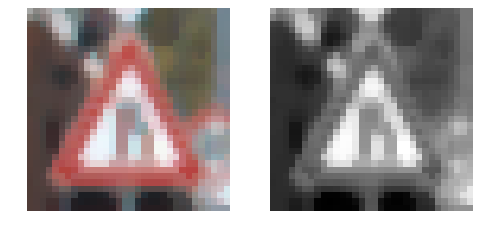

In [10]:
# Visualize gray scale images
f, axarr1 = plt.subplots(1, 2, figsize=(8, 16))
index = random.randint(0, len(X_train)-1)
axarr1[0].imshow(X_train[index])
axarr1[1].imshow(X_train_gray[index].reshape(32,32), cmap='gray')
axarr1[0].axis('off')
axarr1[1].axis('off')


### Model Architecture

In [11]:
# Load required modules
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [12]:
# Hyperparameter definitions
EPOCHS = 50
BATCH_SIZE = 128 # 128
mu = 0
sigma = 0.1
dropout = 0.5

In [13]:
def model_lenet(x, input_channels = 3):
    ##########
    # Layer 1
    ##########
    # Convolution: Input = 32x32x3. Output = 28x28x18.
    f1 = 18
    wc1 = tf.Variable(tf.truncated_normal([5, 5, input_channels, f1], mu, sigma)) # height, weight, input depth, output depth
    b1 = tf.Variable(tf.zeros([f1]))
    conv1 = tf.nn.conv2d(x, wc1, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)

    # Activation function.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x18. Output = 14x14x18.
    layer1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    ##########
    # Layer 2
    ##########
    # Convolution: Input 14x14x18. Output = 10x10x32.
    f2 = 32
    wc2 = tf.Variable(tf.truncated_normal([5, 5, f1, f2], mu, sigma)) # height, weight, input depth, output depth
    b2 = tf.Variable(tf.zeros([f2]))
    conv2 = tf.nn.conv2d(layer1, wc2, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)

    # Activation function.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    layer2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ##########
    # Layer 3
    ##########
    # Convolution: Input 10x10x16. Output = 1x1x400.
    f3 = 400
    wc3 = tf.Variable(tf.truncated_normal([5, 5, f2, f3], mu, sigma))
    b3 = tf.Variable(tf.zeros(f3))
    conv3 = tf.nn.conv2d(layer2, wc3, strides=[1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.bias_add(conv3, b3)
    conv3 = tf.nn.relu(conv3)
    
    ####################
    # Flatten output
    ####################
    fh1 = 5*5*f2
    fc1   = flatten(conv3)
    
    ##########
    # Layer 3
    ##########
    # Fully Connected. Input = 400. Output = 120.
    fcw1 = tf.Variable(tf.truncated_normal([fh1, 120], mu, sigma)) # height, weight, input depth, output depth
    fcb1 = tf.Variable(tf.zeros([120]))
    fc1 = tf.add(tf.matmul(fc1, fcw1), fcb1)

    # Activation function
    fc1 = tf.nn.dropout(fc1, dropout)
    fc1 = tf.nn.relu(fc1)

    ##########
    # Layer 4
    ##########
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fcw2 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))  # height, weight, input depth, output depth
    fcb2 = tf.Variable(tf.zeros([84]))
    fc2 = tf.add(tf.matmul(fc1, fcw2), fcb2)

    # Activation function
    fc2 = tf.nn.dropout(fc2, dropout)
    fc2 = tf.nn.relu(fc2)  

    ##########
    # Layer 5
    ##########
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fcw3 = tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))  # height, weight, input depth, output depth
    fcb3 = tf.Variable(tf.zeros([n_classes]))
    fc3 = tf.add(tf.matmul(fc2, fcw3), fcb3)

    logits = tf.nn.relu(fc3)
    return logits, conv1, conv2


In [14]:
def model_alexnet(x, input_channels = 3):
    ##########
    # Convu 1
    ##########
    # Convolution: Input = 32x32x3. Output = 28x28x48.
    f1 = 48
    wc1 = tf.Variable(tf.truncated_normal([5, 5, input_channels, f1], mu, sigma)) # height, weight, input depth, output depth
    b1 = tf.Variable(tf.zeros([f1]))
    conv1 = tf.nn.conv2d(x, wc1, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)

    # Activation function.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x48. Output = 14x14x48.
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    ##########
    # Convu 2
    ##########
    # Convolution: Input 14x14x48. Output = 12x12x96.
    f2 = 96
    wc2 = tf.Variable(tf.truncated_normal([3, 3, f1, f2], mu, sigma)) # height, weight, input depth, output depth
    b2 = tf.Variable(tf.zeros([f2]))
    conv2 = tf.nn.conv2d(pool1, wc2, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)

    # Activation function.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 12x12x96. Output = 6x6x96.
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ##########
    # Convu 3
    ##########
    # Convolution: Input 6x6x96. Output = 6x6x128.
    f3 = 128
    wc3 = tf.Variable(tf.truncated_normal([3, 3, f2, f3], mu, sigma)) # height, weight, input depth, output depth
    b3 = tf.Variable(tf.zeros([f3]))
    conv3 = tf.nn.conv2d(pool2, wc3, strides=[1, 1, 1, 1], padding='SAME')
    conv3 = tf.nn.bias_add(conv3, b3)

    # Activation function.
    conv3 = tf.nn.relu(conv3)
    
    ##########
    # Convu 4
    ##########
    # Convolution: Input 6x6x128. Output = 6x6x128.
    f4 = 128 #192 #27
    wc4 = tf.Variable(tf.truncated_normal([3, 3, f3, f4], mu, sigma)) # height, weight, input depth, output depth
    b4 = tf.Variable(tf.zeros([f4]))
    conv4 = tf.nn.conv2d(conv3, wc4, strides=[1, 1, 1, 1], padding='SAME')
    conv4 = tf.nn.bias_add(conv4, b4)

    # Activation function.
    conv4 = tf.nn.relu(conv4)
    
    ##########
    # Convu 5
    ##########
    # Convolution: Input 6x6x128. Output = 6x6x96.
    f5 = 96 #128 #18
    wc5 = tf.Variable(tf.truncated_normal([3, 3, f4, f5], mu, sigma)) # height, weight, input depth, output depth
    b5 = tf.Variable(tf.zeros([f5]))
    conv5 = tf.nn.conv2d(conv4, wc5, strides=[1, 1, 1, 1], padding='SAME')
    conv5 = tf.nn.bias_add(conv5, b5)

    # Activation function.
    conv5 = tf.nn.relu(conv5)
    
    # Pooling. Input = 6x6x96. Output = 3x3x96.
    pool3 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten Input = 3x3x96. Output = 864
    fh1 = 3*3*f5
    fc1 = flatten(pool3)
    
    # Fully Connected. Input = 864. Output = 120.
    fcw1 = tf.Variable(tf.truncated_normal([fh1, 120], mu, sigma)) # height, weight, input depth, output depth
    fcb1 = tf.Variable(tf.zeros([120]))
    fc1 = tf.add(tf.matmul(fc1, fcw1), fcb1)

    # Activation function
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    ##########
    # Layer 4
    ##########
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fcw2 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))  # height, weight, input depth, output depth
    fcb2 = tf.Variable(tf.zeros([84]))
    fc2 = tf.add(tf.matmul(fc1, fcw2), fcb2)

    # Activation function
    fc2 = tf.nn.relu(fc2)  
    fc2 = tf.nn.dropout(fc2, dropout)

    ##########
    # Layer 5
    ##########
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fcw3 = tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))  # height, weight, input depth, output depth
    fcb3 = tf.Variable(tf.zeros([n_classes]))
    fc3 = tf.add(tf.matmul(fc2, fcw3), fcb3)

    logits = tf.nn.relu(fc3)
    return logits, conv1, conv2, conv3, conv4, conv5

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Features and labels
if use_gray == True:
    x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # Grayscale
else:
    x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # RGB

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training rate
rate = 0.00097

if use_gray == True:
    logits, conv1, conv2, conv3, conv4, conv5 = model_alexnet(x, 1)
else:
    logits, conv1, conv2, conv3, conv4, conv5 = model_alexnet(x)
    
    
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)    
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)

    print("Training...")
    print()
    validation_accuracy_history = []
    train_accuracy_history = []
    
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid_norm, y_valid)
        validation_accuracy_history.append(validation_accuracy)
        train_accuracy = evaluate(X_train_norm, y_train)
        train_accuracy_history.append(train_accuracy)
        
        print("EPOCH {} ...".format(i + 1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './model')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.573
Validation Accuracy = 0.512

EPOCH 2 ...
Train Accuracy = 0.828
Validation Accuracy = 0.764

EPOCH 3 ...
Train Accuracy = 0.895
Validation Accuracy = 0.838

EPOCH 4 ...
Train Accuracy = 0.924
Validation Accuracy = 0.880

EPOCH 5 ...
Train Accuracy = 0.944
Validation Accuracy = 0.911

EPOCH 6 ...
Train Accuracy = 0.955
Validation Accuracy = 0.919

EPOCH 7 ...
Train Accuracy = 0.958
Validation Accuracy = 0.919

EPOCH 8 ...
Train Accuracy = 0.967
Validation Accuracy = 0.928

EPOCH 9 ...
Train Accuracy = 0.971
Validation Accuracy = 0.935

EPOCH 10 ...
Train Accuracy = 0.974
Validation Accuracy = 0.942

EPOCH 11 ...
Train Accuracy = 0.972
Validation Accuracy = 0.932

EPOCH 12 ...
Train Accuracy = 0.975
Validation Accuracy = 0.936

EPOCH 13 ...
Train Accuracy = 0.982
Validation Accuracy = 0.950

EPOCH 14 ...
Train Accuracy = 0.983
Validation Accuracy = 0.954

EPOCH 15 ...
Train Accuracy = 0.984
Validation Accuracy = 0.947

EPOCH 16 ...
Train Ac

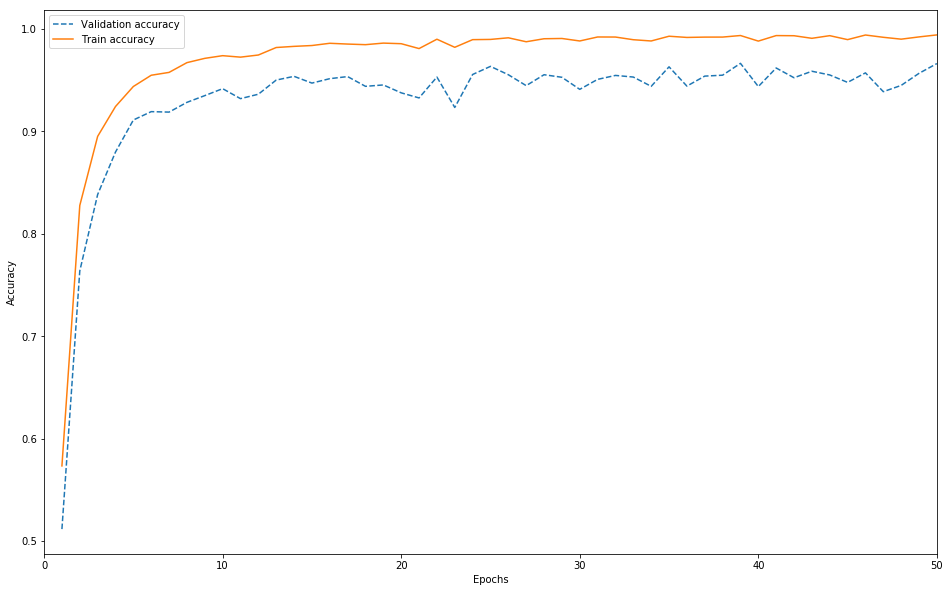

In [17]:
def plot_history(validation_accuracy_history, train_accuracy_history):
    plt.figure(figsize=(16,10))
    epo = np.linspace(1, EPOCHS, EPOCHS)
    plt.plot(epo, validation_accuracy_history,'--', label='Validation accuracy')
    plt.plot(epo, train_accuracy_history, label='Train accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.xlim([0,EPOCHS])


plot_history(validation_accuracy_history, train_accuracy_history)



In [18]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\model
Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Processing image 1


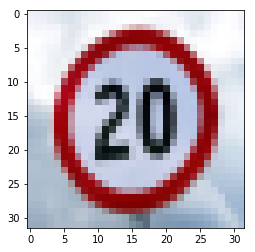

Processing image 2


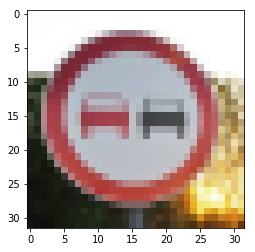

Processing image 3


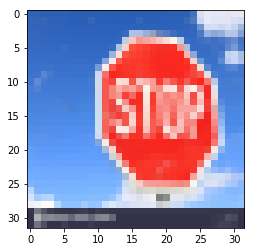

Processing image 4


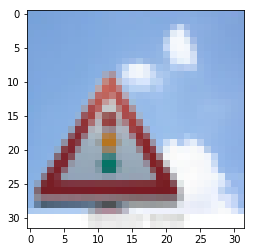

Processing image 5


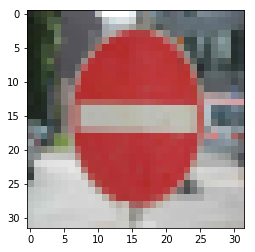

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2

web_images = []
web_labels = [0,9,14,26,17]

def load_images():
    image_list = []
    
    for file in os.listdir("test_signs/"):
        # get file name and file extension
        file_name, file_ext = os.path.splitext(file)
        print("Processing image", file_name)
        # read in the image
        image = cv2.imread('test_signs/' + file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )

        # resize image
        resize_image = cv2.resize(image,(32, 32), interpolation = cv2.INTER_AREA)
        
        # Ouput image
        plt.imshow(resize_image)
        plt.show()
    
        image_list.append(resize_image)
        
    return image_list
        
web_images = load_images()

# Convert images to grayscale and normalize
if use_gray == True:
    # Convert images to gray scale
    web_images = rgb2gray(web_images)
    web_images = web_images.reshape(len(web_images),32,32,1)

# Normailize    
web_images = normalize_image(web_images)

### Predict the Sign Type for Each Image

In [66]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(web_images, web_labels)
    
    logits_value = sess.run(logits, feed_dict={x: web_images})
    probabilities = sess.run(tf.nn.softmax(logits_value))
    
    predictions = probabilities.argmax(axis=1)

INFO:tensorflow:Restoring parameters from .\model


### Analyze Performance

In [67]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Accuracy = {:.3f}".format(test_accuracy))   


print("Predictions vs. Actual")
print('Predictions:')
print(signnames[predictions])
print()
print('Actual:')
print(signnames[np.array(web_labels)])

Test Accuracy = 0.800
Predictions vs. Actual
Predictions:
0     Speed limit (20km/h)
9               No passing
14                    Stop
40    Roundabout mandatory
17                No entry
Name: SignName, dtype: object

Actual:
0     Speed limit (20km/h)
9               No passing
14                    Stop
26         Traffic signals
17                No entry
Name: SignName, dtype: object


In [44]:
# Using test set, test the accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    for label_id in web_labels:
        test_images = X_test_norm[np.where(y_test == label_id)]
        test_labels = np.full(test_images.shape[0], label_id)


        test_accuracy = evaluate(test_images, test_labels)

        logits_value = sess.run(logits, feed_dict={x: test_images})
        test_probabilities = sess.run(tf.nn.softmax(logits_value))

        predictions = test_probabilities.argmax(axis=1)

        print("Test set accuracy for {} = {:.3f}".format(signnames[label_id], test_accuracy))   

INFO:tensorflow:Restoring parameters from .\model
Test set accuracy for Speed limit (20km/h) = 1.000
Test set accuracy for No passing = 0.990
Test set accuracy for Stop = 0.904
Test set accuracy for Traffic signals = 0.850
Test set accuracy for No entry = 0.908


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

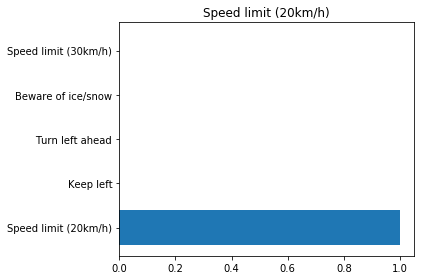

[9.9998367e-01 7.4280542e-06 5.6355257e-06 2.8317320e-06 4.9349438e-07]
[9.9998e-01 1.0000e-05 1.0000e-05 0.0000e+00 0.0000e+00]


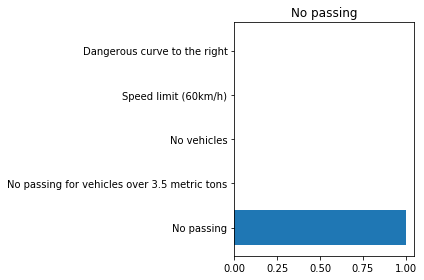

[1.0000000e+00 5.6661497e-20 1.4798388e-23 1.3772818e-27 1.4492809e-29]
[1. 0. 0. 0. 0.]


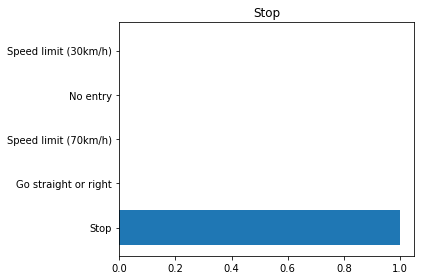

[9.9999952e-01 4.3750902e-07 3.5026112e-08 9.8650843e-10 5.1559934e-10]
[1. 0. 0. 0. 0.]


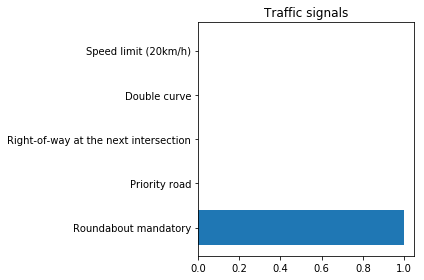

[9.9882239e-01 9.3043625e-04 2.0911558e-04 3.7770416e-05 5.8495724e-09]
[9.9882e-01 9.3000e-04 2.1000e-04 4.0000e-05 0.0000e+00]


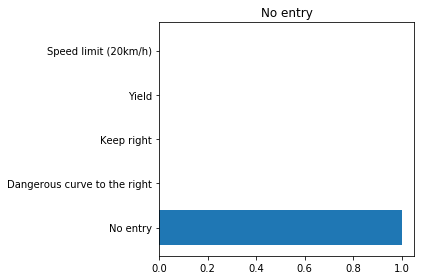

[1.0000000e+00 3.0226710e-21 4.5292681e-35 1.0017872e-37 0.0000000e+00]
[1. 0. 0. 0. 0.]


In [75]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top5softmax = sess.run(tf.nn.top_k(tf.constant(probabilities), k=5))

for i in range(len(web_images)):
    plt.barh(np.arange(5), top5softmax.values[i])
    plt.yticks(np.arange(5), signnames[top5softmax.indices[i]])
    signnames_key = np.array(web_labels[i])
    plt.title("{}".format(signnames[int(signnames_key)]))
    plt.tight_layout()
    plt.show()
    
    print((top5softmax.values[i]))
    print(np.round(top5softmax.values[i], 5))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    rows = featuremaps/8
    plt.figure(plt_num, figsize=(15, rows*3))
    for featuremap in range(featuremaps):
        plt.subplot(rows,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from .\model
ix 272
Feature maps for 34


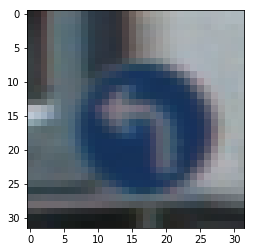

First convolutional layer


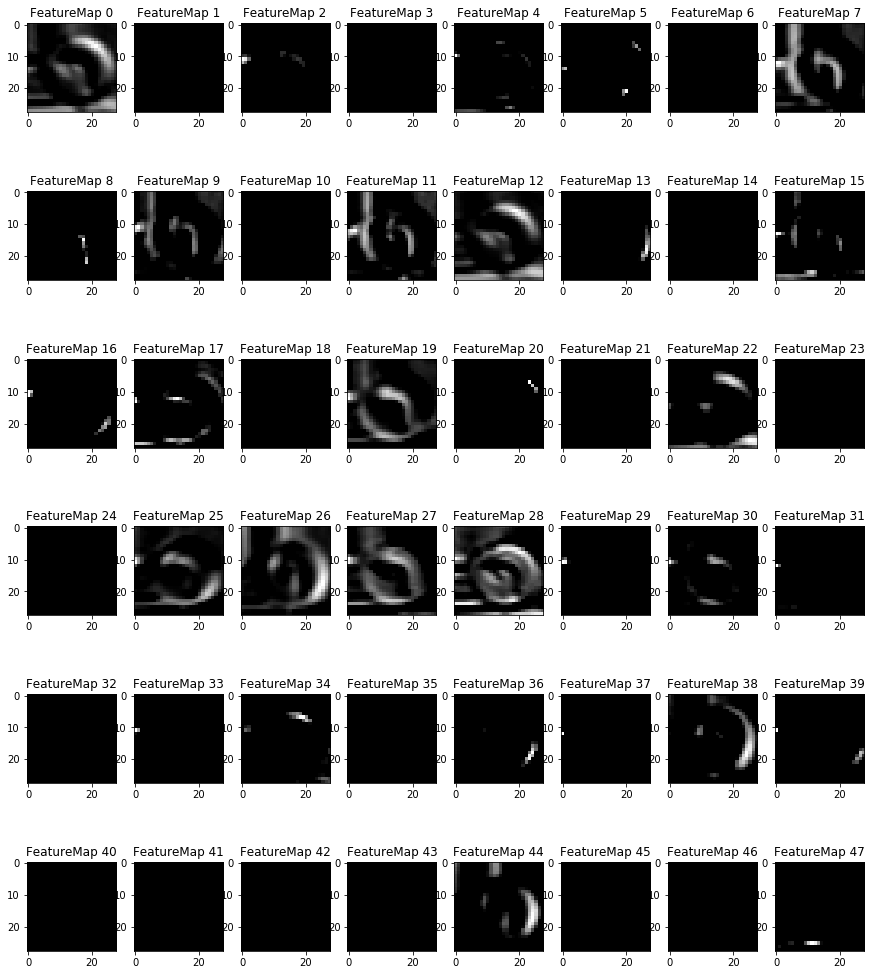

Second convolutional layer


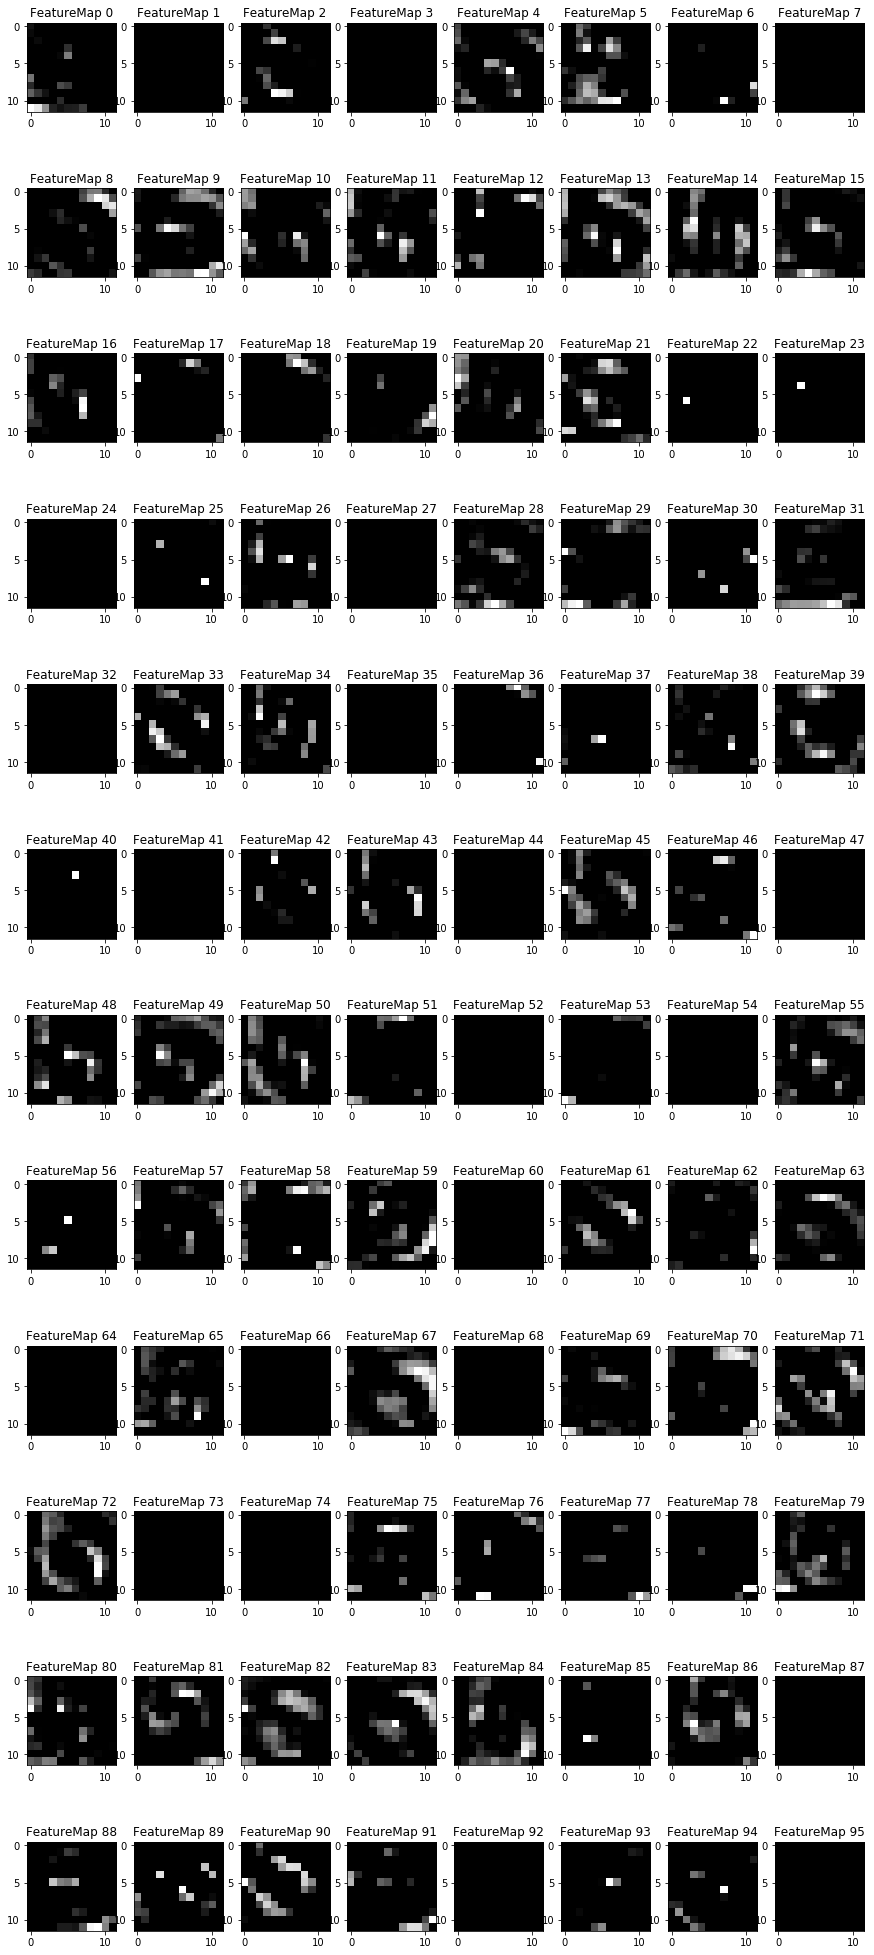

Third convolutional layer


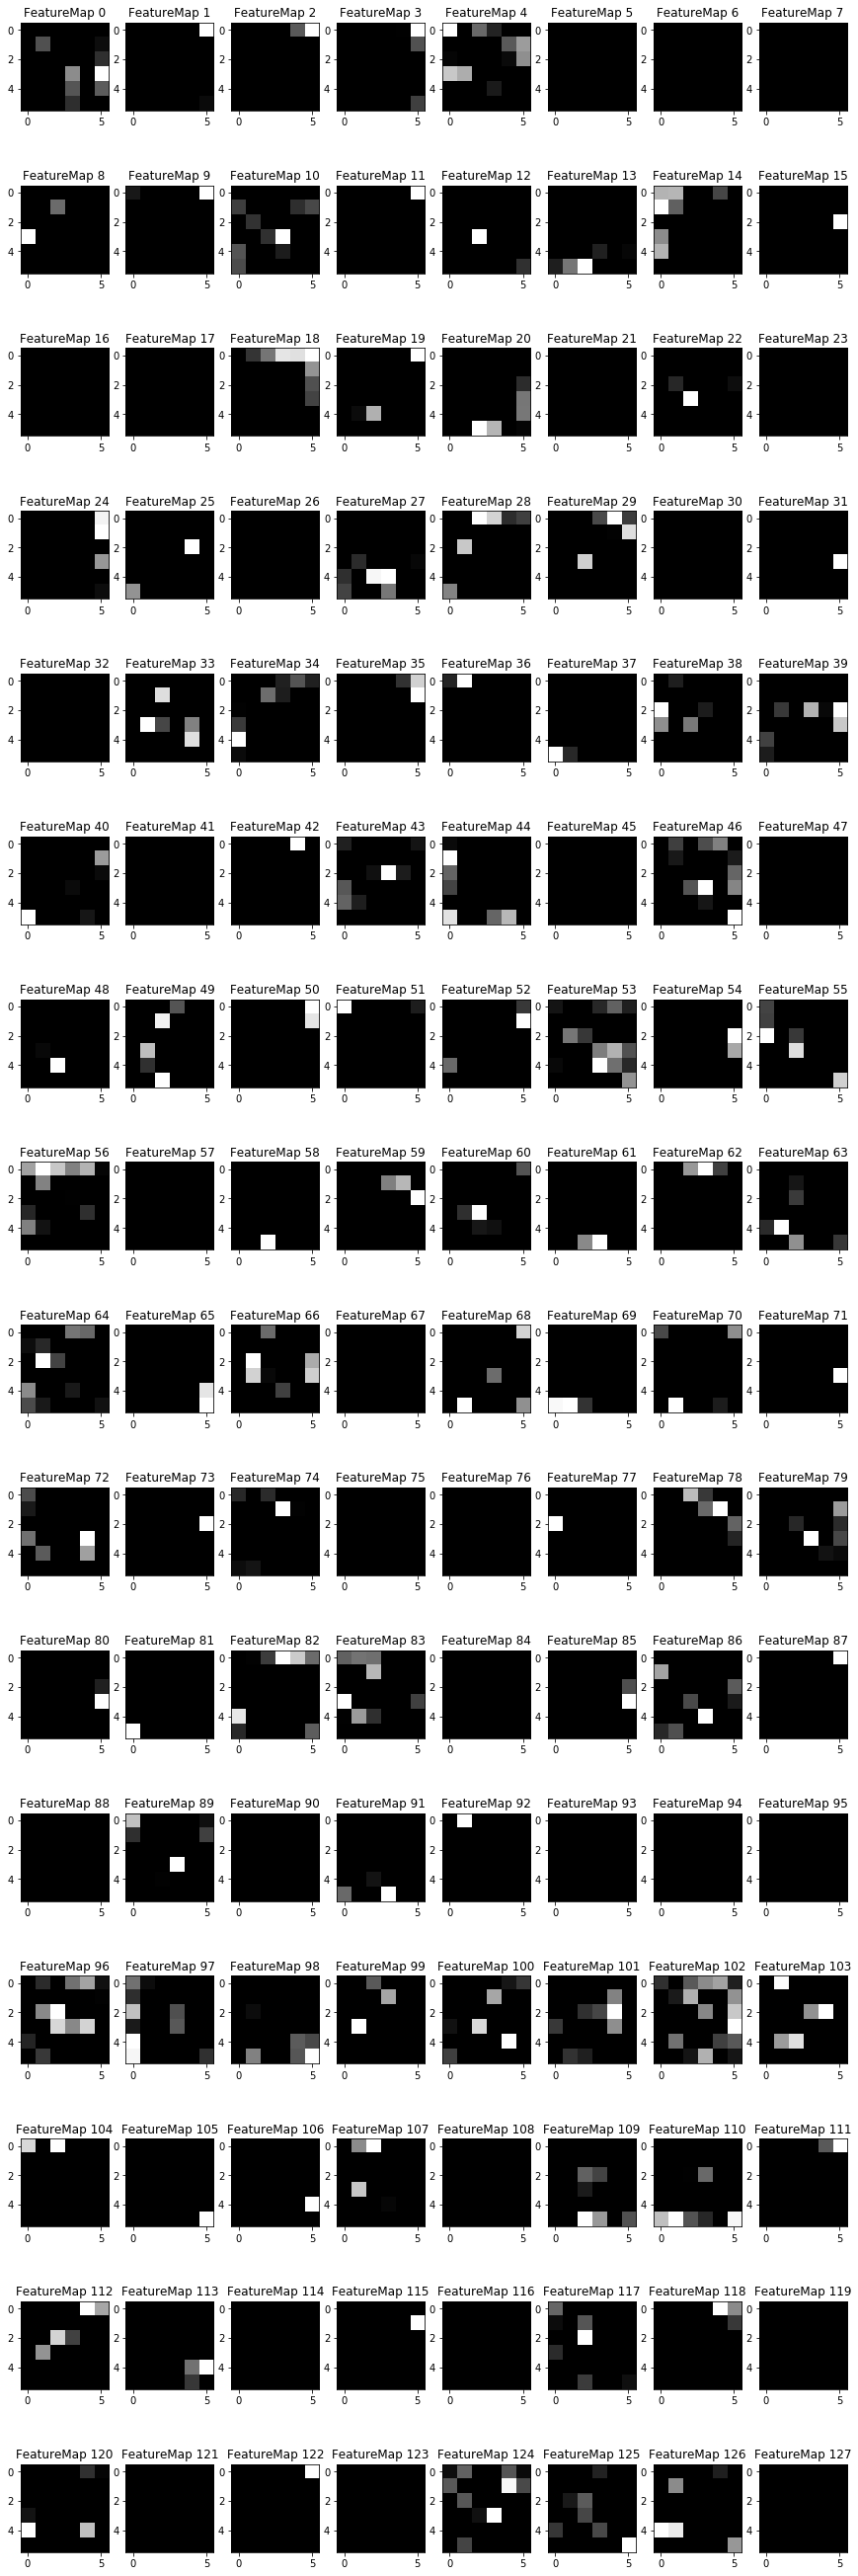

Fourth convolutional layer


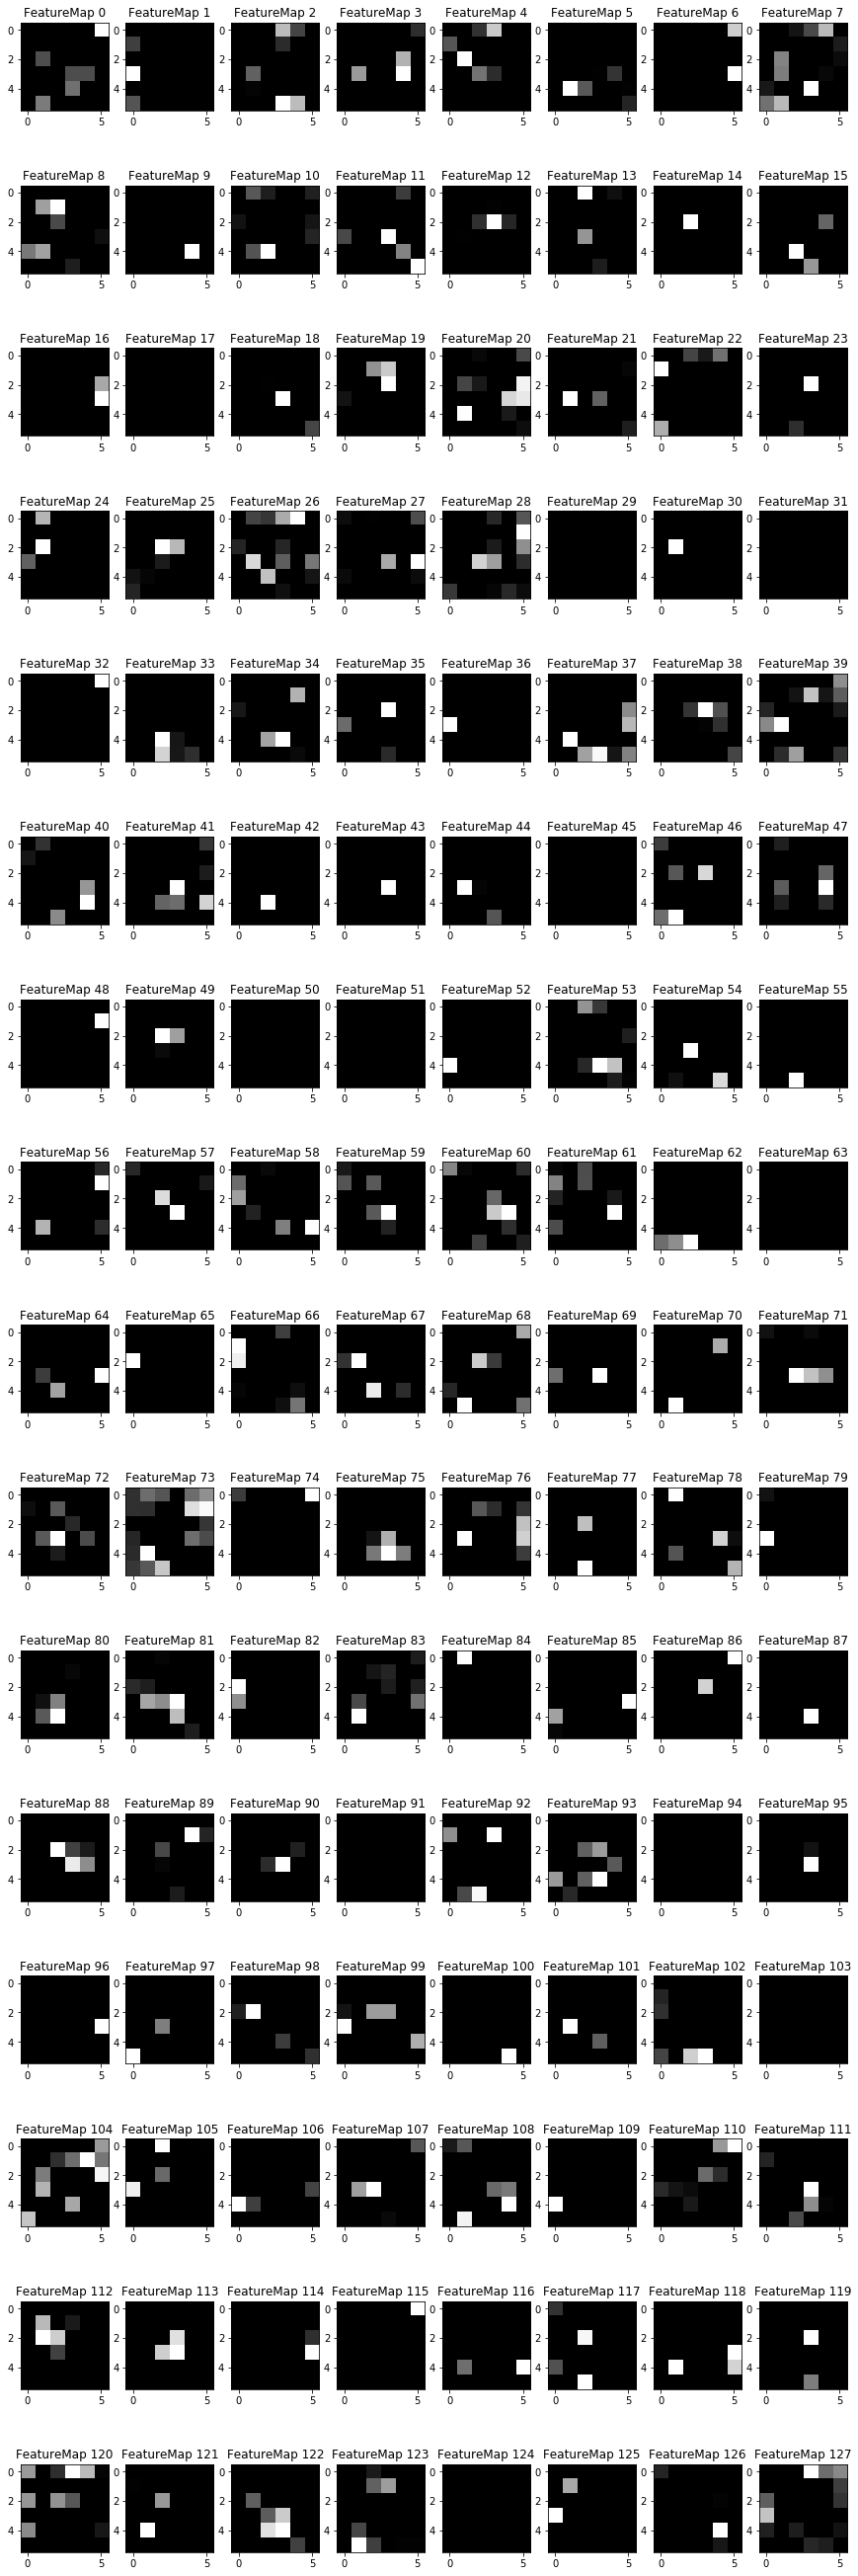

Fith convolutional layer


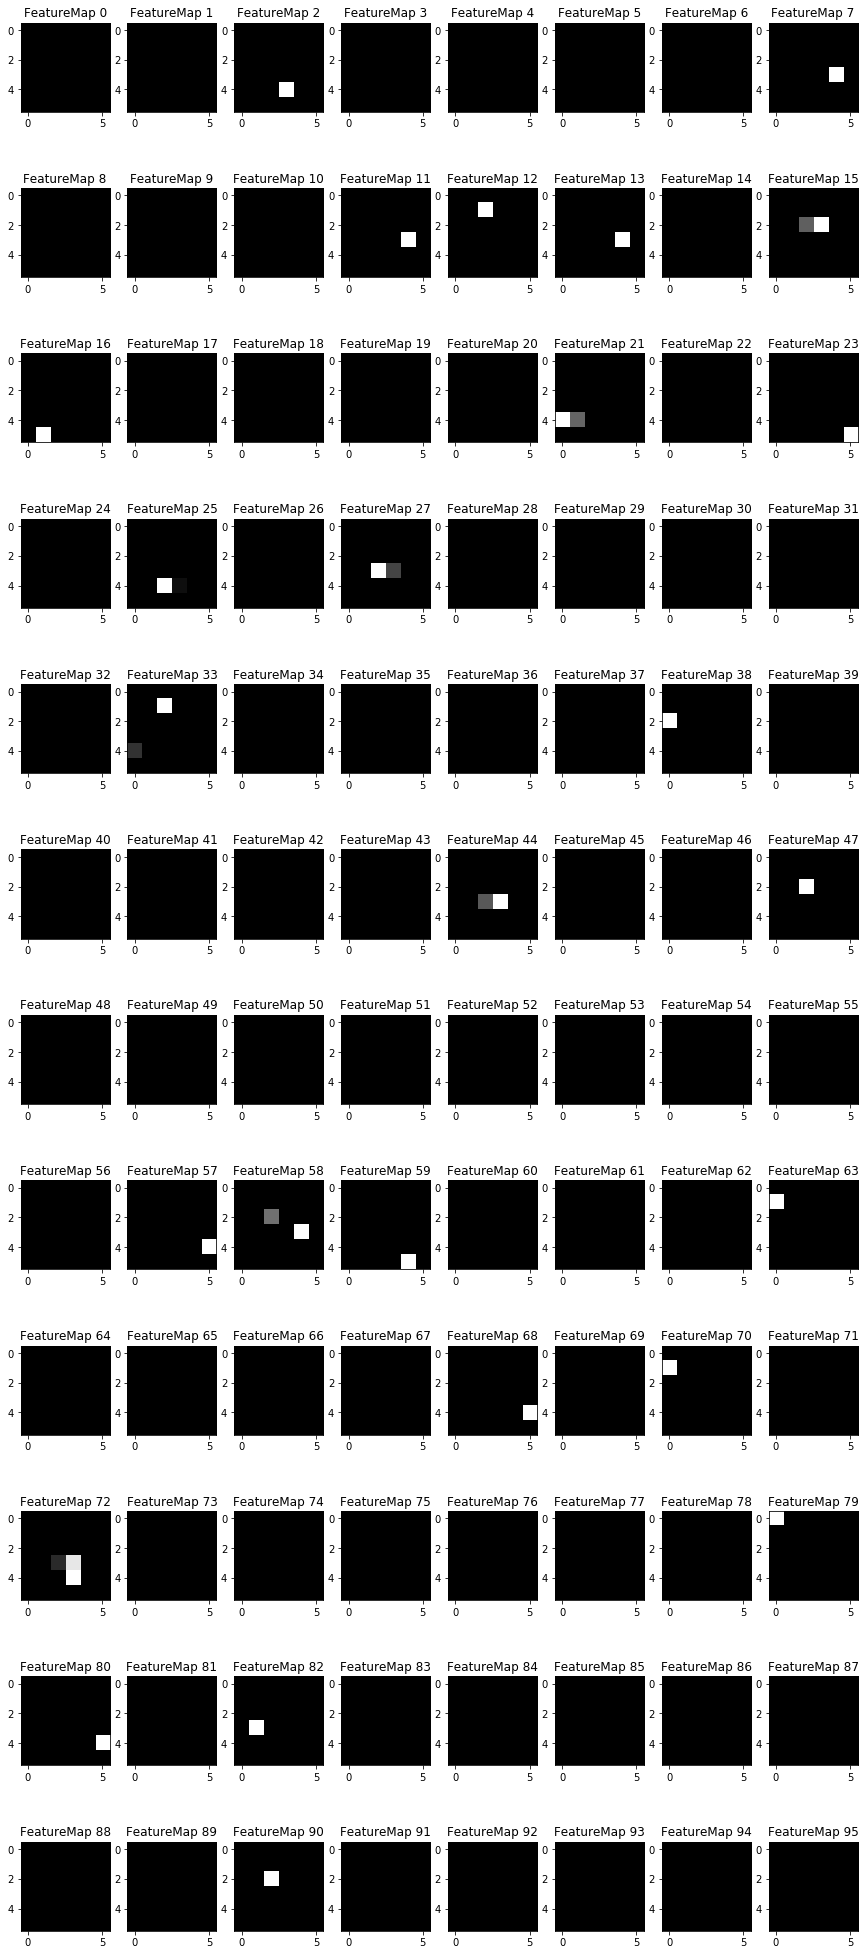

In [76]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ix = random.randint(0, len(X_test_norm)-1)
    image_input = np.expand_dims(X_test_norm[ix], axis=0)
    print('ix', ix)
    print('Feature maps for', y_test[ix])
    plt.imshow(X_test[ix])
    plt.show()
    print('First convolutional layer')
    outputFeatureMap(image_input, conv1, plt_num=1)
    plt.show()
    print('Second convolutional layer')
    outputFeatureMap(image_input, conv2, plt_num=2)
    plt.show()
    print('Third convolutional layer')
    outputFeatureMap(image_input, conv3, plt_num=3)
    plt.show()
    print('Fourth convolutional layer')
    outputFeatureMap(image_input, conv4, plt_num=4)
    plt.show()
    print('Fith convolutional layer')
    outputFeatureMap(image_input, conv5, plt_num=5)
    plt.show()